In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/car_evaluation.csv')

In [11]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [13]:
data.shape

(1727, 7)

In [14]:
data.columns=['Buying','Maintenance','Doors','Persons','Bootspace','Safety','Class']

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1727 non-null   object
 1   Maintenance  1727 non-null   object
 2   Doors        1727 non-null   object
 3   Persons      1727 non-null   object
 4   Bootspace    1727 non-null   object
 5   Safety       1727 non-null   object
 6   Class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [18]:
for col in data.columns:
  print(data[col].value_counts(),'\n')

Buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 

Maintenance
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 

Doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64 

Persons
4       576
more    576
2       575
Name: count, dtype: int64 

Bootspace
med      576
big      576
small    575
Name: count, dtype: int64 

Safety
med     576
high    576
low     575
Name: count, dtype: int64 

Class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64 



In [19]:
data.isnull().sum()

Buying         0
Maintenance    0
Doors          0
Persons        0
Bootspace      0
Safety         0
Class          0
dtype: int64

In [22]:
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [23]:
encoder=ce.OrdinalEncoder(cols=['Buying','Maintenance','Doors','Persons','Bootspace','Safety','Class'])
data=encoder.fit_transform(data)

In [24]:
data.head()

,Buying,Maintenance,Doors,Persons,Bootspace,Safety,Class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


In [25]:
x=data.drop(['Class'],axis=1)
y=data['Class']

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.33,random_state=42)

In [27]:
xtrain.head()

,Buying,Maintenance,Doors,Persons,Bootspace,Safety
83,1,1,4,1,2,3
48,1,1,2,3,2,1
468,2,1,2,2,1,1
155,1,2,2,3,2,3
1043,3,2,3,3,1,3


In [31]:
print(xtrain.shape),
print(xtest.shape)

(1157, 6)
(570, 6)


In [32]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.6, 0.875, 'x[5] <= 2.5\ngini = 0.457\nsamples = 1157\nvalue = [810, 257, 39, 51]'),
 Text(0.4, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [419, 257, 39, 51]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [242, 0, 0, 0]'),
 Text(0.6, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [177, 257, 39, 51]'),
 Text(0.4, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [142, 124, 0, 0]'),
 Text(0.8, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [35, 133, 39, 51]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [391, 0, 0, 0]')]

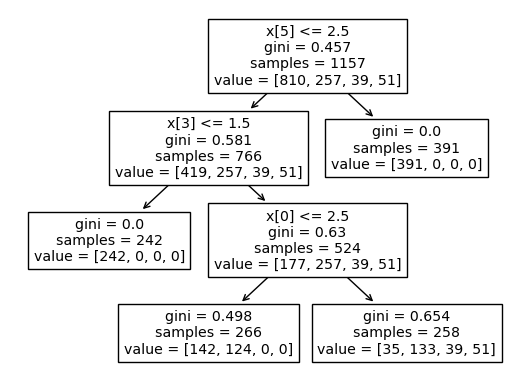

In [33]:
from sklearn import tree
tree.plot_tree(clf_gini)

In [37]:
ypred_test_gini=clf_gini.predict(xtest)
ypred_test_gini

array([1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred_gini))

0.8052631578947368


In [40]:
ypred_train_gini=clf_gini.predict(xtrain)
ypred_train_gini
print(accuracy_score(ytrain, ypred_train_gini))

0.7847882454624028
